In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from pathlib import Path

import evaluate_performance as ep

Using TensorFlow backend.


In [2]:
model = ep.create_model(ep.IMAGE_SIZE, ep.ALPHA)
model.load_weights(ep.WEIGHTS_FILE)


Trying out unscaled image


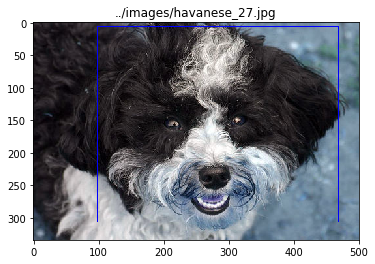

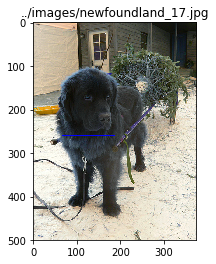

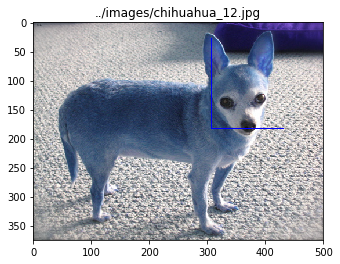

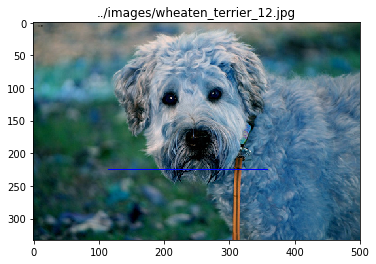

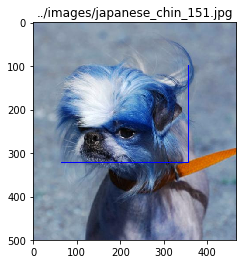

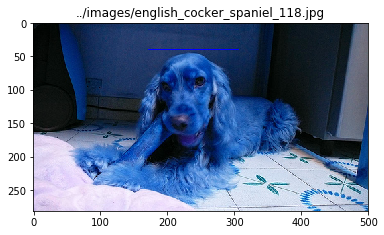

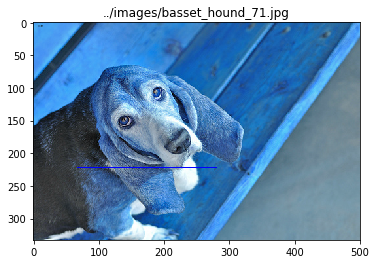

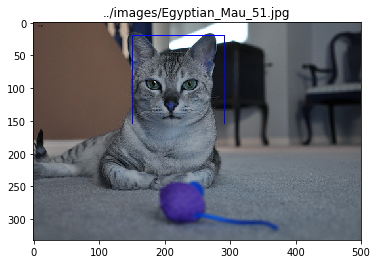

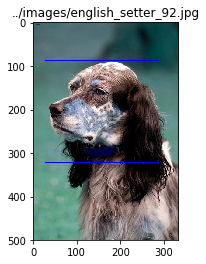

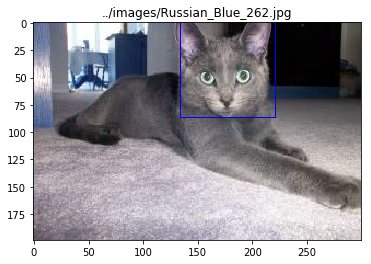

In [3]:
print("\nTrying out unscaled image")

image_paths = Path("../images/").glob('*.jpg')
    
for path in random.sample(list(image_paths), 10):
    path = str(path)
    
    pred = ep.predict_image(path, model)

    height, width, _ = cv2.imread(path).shape
    scaled = np.array([pred[0] * width / ep.IMAGE_SIZE, pred[1] * height / ep.IMAGE_SIZE,
                      pred[2] * width / ep.IMAGE_SIZE, pred[3] * height / ep.IMAGE_SIZE])
    image = ep.get_image_with_boxes(path, np.array([0]), np.floor(scaled).astype(int))
    
    plt.imshow(image)
    plt.title(path)
    plt.show()    

In [18]:
def display_dataset_with_iou(csv_file, model):   
    ious = []
    
    for i, (path, ground_truth) in enumerate(random.sample(list(ep.iterate_dataset(csv_file)),10) ):

        pred = ep.predict_image(path, model)

        iou_ = ep.iou(ground_truth, pred)
        ious.append(iou_)

        print("IoU for {} is {}".format(path, iou_))
        image = ep.get_image_with_boxes(path, ground_truth, pred)
        
        plt.imshow(image)
        plt.show()   

    np.set_printoptions(suppress=True)
    print("\nAvg IoU: {}".format(np.mean(ious)))
    print("Highest IoU: {}".format(np.max(ious)))
    print("Lowest IoU: {}".format(np.min(ious)))

IoU on training data


IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/train/leonberger_118.jpg is 0.8759259259259259


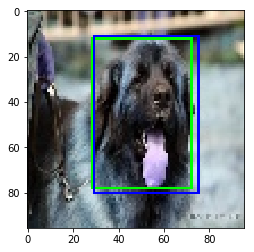

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/train/British_Shorthair_185.jpg is 0.9016393442622951


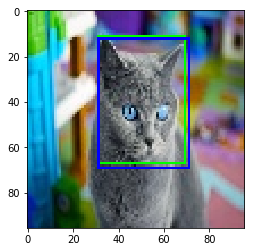

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/train/samoyed_183.jpg is 0.8578431372549019


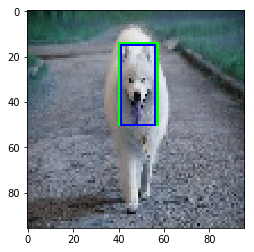

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/train/great_pyrenees_180.jpg is 0.8685714285714285


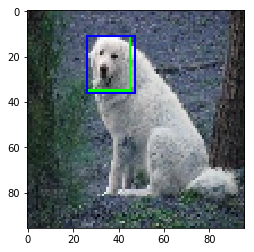

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/train/Abyssinian_106.jpg is 0.7416462917685411


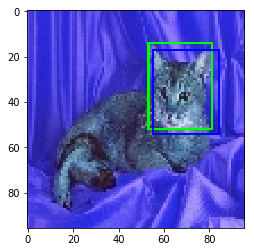

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/train/chihuahua_153.jpg is 0.7269681742043551


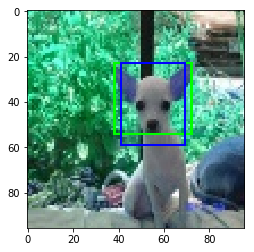

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/train/basset_hound_105.jpg is 0.9150779896013865


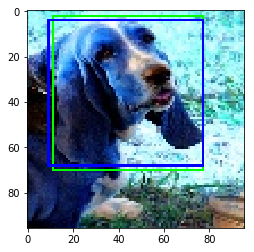

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/train/Russian_Blue_19.jpg is 0.9329777777777778


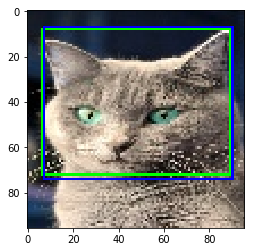

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/train/saint_bernard_175.jpg is 0.8125


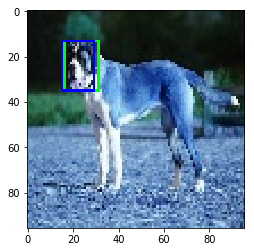

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/train/chihuahua_123.jpg is 0.48877805486284287


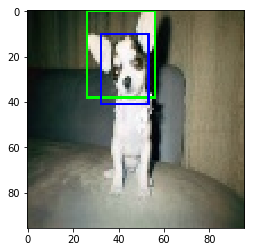


Avg IoU: 0.8121928124229454
Highest IoU: 0.9329777777777778
Lowest IoU: 0.48877805486284287


In [19]:
print("IoU on training data")
display_dataset_with_iou(ep.TRAIN_CSV, model)


IoU on validation data
IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/validation/Maine_Coon_126.jpg is 0.8354336545589326


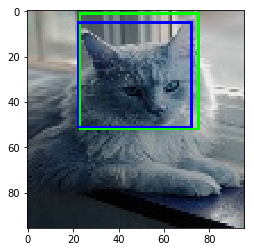

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/validation/leonberger_173.jpg is 0.7897233201581028


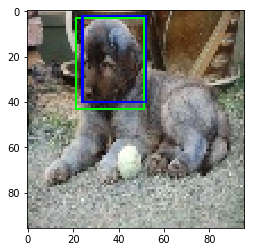

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/validation/pomeranian_14.jpg is 0.9366958311888832


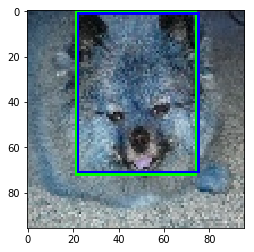

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/validation/Bengal_170.jpg is 0.9285714285714286


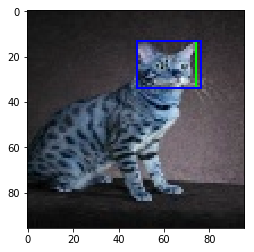

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/validation/leonberger_121.jpg is 1.0


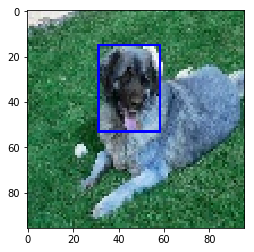

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/validation/japanese_chin_167.jpg is 0.8815426997245179


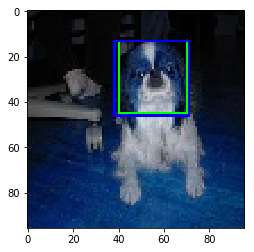

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/validation/Bengal_130.jpg is 0.7553648068669528


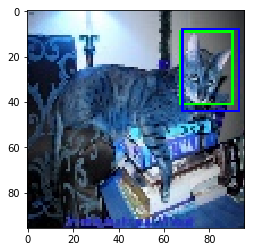

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/validation/wheaten_terrier_188.jpg is 0.75


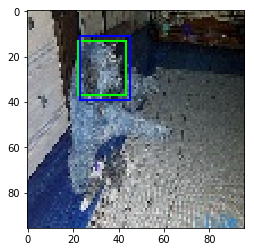

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/validation/Egyptian_Mau_161.jpg is 0.8518518518518519


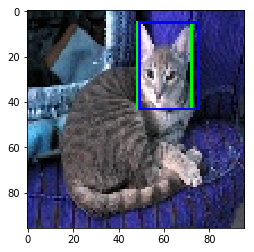

IoU for /home/ubuntu/workspace/tensorflow-environment/object-localization/validation/german_shorthaired_188.jpg is 0.8706597222222222


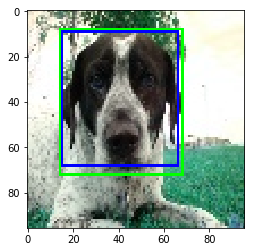


Avg IoU: 0.8599843315142891
Highest IoU: 1.0
Lowest IoU: 0.75


In [20]:
print("\nIoU on validation data")
display_dataset_with_iou(ep.VALIDATION_CSV, model)